# 07 군집화

## 01. K 평균 알고리즘의 이해
* k-평균은 군집 중심점이라는 특정한 임의의 지점을 선택해 해당 중심에 가장 가까운 포인트들을 선택하는 군집화 기법이다.
  * 1. 군집화의 기준이 되는 중심을 구성하려는 군집화 개수만큼 임의의 위치에 가져다 놓는다.
  * 2. 각 데이터는 가장 가까운 곳에 위치한 중심점에 소속된다.
  * 3. 군집 중심점을 소속된 데이터의 편균 중심으로 이동한다.
  * 4. 중심점이 이동했기에 각 데이터는 기존에 속한 중심점보다 더 가까운 중심점이 있다면 해당 중심점으로 다시 소속을 변경한다.
  * 5. 다시 중심을 소속된 데이터의 평균 중심으로 이동한다.
  * 6. 중심점을 이동했는데 데이터의 중심점 소속 변경이 없으면 군집화를 종료한다. 그렇지 않으면 4번 과정을 거쳐서 소속을 변경하고 과정을 반복한다.
* k 평균의 장점
  * 일반적인 군집화에서 가장 많이 활용되는 알고리즘이다.
  * 알고리즘이 쉽고 간결하다.
* k 평균의 단점
  * 거리 기반 알고리즘으로 속성의 개수가 매우 많을 경우 군집화 정확도가 떨어진다.(pca 로 차원감소를 적용해야 할 수도 있다.)
  * 반복을 수행하는데 반복횟수가 많을 경우 수행시간이 매우 느려진다.
  * 몇개의 군집을 선택해야할지 가이드 하기가 힘들다

### k-평균을 이용한 붓꽃 데이터 세트 군집화

꽃받침, 꽃잎의 길이에 따라 각 데이터의 군집화가 어떻게 결정되는지 확인해보고 이를 분류값과 비교 시행
* 붓꽃 데이터 세트 불러오고 dataframe 형태로 변환

In [ ]:
from sklearn.preprocessing import scale
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline

iris = load_iris()
# 보다 편리한 데이터 Handling을 위해 DataFrame으로 변환
irisDF = pd.DataFrame(data=iris.data, columns=['sepal_length','sepal_width','petal_length','petal_width'])
irisDF.head(3)

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2


붓꽃 데이터 세트 3개의 군집으로 군집화

In [ ]:
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=300,random_state=0)
kmeans.fit(irisDF)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=3, random_state=0)

군집화 수행 결과를 kmeans의 labels_ 속성값으로 확인

In [ ]:
print(kmeans.labels_)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 2 2 2 2 0 2 2 2 2
 2 2 0 0 2 2 2 2 0 2 0 2 0 2 2 0 0 2 2 2 2 2 0 2 2 2 2 0 2 2 2 0 2 2 2 0 2
 2 0]


group by 연산을 통해 target 과 cluster 값을 비교
* 결과: 0번 타겟에는 1번 클러스터 50개, 1번 타켓은 0번 클러스터 48개 2번 클러스터 2개, 2번 타겟이는 0번 클러스터 14개, 2번 클러스터 36개 분류

In [ ]:
irisDF['target'] = iris.target
irisDF['cluster']=kmeans.labels_
iris_result = irisDF.groupby(['target','cluster'])['sepal_length'].count()
print(iris_result)

target  cluster
0       1          50
1       0          48
        2           2
2       0          14
        2          36
Name: sepal_length, dtype: int64


붓꽃 데이터 세트의 군집화를 시각화
* 붓꽃 데이터 세트의 속성이 4개이므로 2차원 평면에 적합하지 않다. pca 를 이용하여 4개의 속성을 2개의 차원으로 축소한 뒤에 x,y 좌표 개별 데이터를 표현

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca_transformed = pca.fit_transform(iris.data)

irisDF['pca_x'] = pca_transformed[:,0]
irisDF['pca_y'] = pca_transformed[:,1]
irisDF.head(3)

,sepal_length,sepal_width,petal_length,petal_width,target,cluster,pca_x,pca_y
0,5.1,3.5,1.4,0.2,0,1,-2.684126,0.319397
1,4.9,3.0,1.4,0.2,0,1,-2.714142,-0.177001
2,4.7,3.2,1.3,0.2,0,1,-2.888991,-0.144949


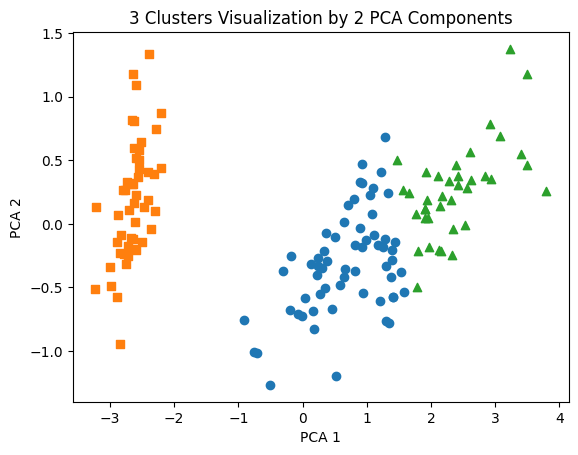

In [ ]:
# 군집 값이 0, 1, 2인 경우마다 별도의 인덱스로 추출
marker0_ind = irisDF[irisDF['cluster']==0].index
marker1_ind = irisDF[irisDF['cluster']==1].index
marker2_ind = irisDF[irisDF['cluster']==2].index

# 군집 값 0, 1, 2에 해당하는 인덱스로 각 군집 레벨의 pca_x, pca_y 값 추출. o, s, ^ 로 마커 표시
plt.scatter(x=irisDF.loc[marker0_ind, 'pca_x'], y=irisDF.loc[marker0_ind, 'pca_y'], marker='o')
plt.scatter(x=irisDF.loc[marker1_ind, 'pca_x'], y=irisDF.loc[marker1_ind, 'pca_y'], marker='s')
plt.scatter(x=irisDF.loc[marker2_ind, 'pca_x'], y=irisDF.loc[marker2_ind, 'pca_y'], marker='^')

plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.title('3 Clusters Visualization by 2 PCA Components')
plt.show()


### Clustering 알고리즘 테스트를 위한 데이터 생성


사이킷런은 알고리즘을 테스트해보기 위해 간단한 데이터 생성기를 제공 (make_blobs() 와 make_classification() API)

* make blobs() 의 호출 파라미터
  * n_samples: 생성할 총 데이터 개수
  * n_features: 데이터 피처의 개수
  * centers: int 값
  * cluster_std: 생성될 군집의 표준편차

200개의 레코드와 2개의 피처ㅇ가 3개의 군집화 기반 분포도를 가진 피처 데이터 세트 x와 동시에 3개의 군집화 값을 가진 타겟데이터 세트 y 반환

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
%matplotlib inline

X, y = make_blobs(n_samples=200, n_features=2, centers=3, cluster_std=0.8, random_state=0)
print(X.shape, y.shape)

# y target 값의 분포를 확인
unique, counts = np.unique(y, return_counts=True)
print(unique,counts)

(200, 2) (200,)
[0 1 2] [67 67 66]


데이터 가공을 편리하게 하기 위해 dataframe 으로 전환

In [ ]:
import pandas as pd

clusterDF = pd.DataFrame(data=X, columns=['ftr1', 'ftr2'])
clusterDF['target'] = y
clusterDF.head(3)

,ftr1,ftr2,target
0,-1.692427,3.622025,2
1,0.697940,4.428867,0
2,1.100228,4.606317,0


타겟값 0,1,2에 따라 마커를 다르게 하여 산점도 그리기 -> 3개의 구분될 수 있는 군집 영역으로 피처 데이터 세트가 만들어짐

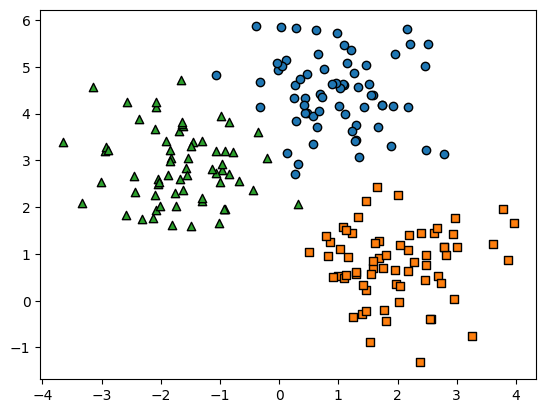

In [ ]:
target_list = np.unique(y)
# 각 타깃별 산점도의 마커 값.
markers=['o', 's', '^', 'P', 'D', 'H', 'x']
# 3개의 군집 영역으로 구분한 데이터 세트를 생성했으므로 target_list는 [0, 1, 2]
# target==0, target==1, target==2 로 scatter plot을 marker별로 생성.
for target in target_list:
    target_cluster = clusterDF[clusterDF['target']==target]
    plt.scatter(x=target_cluster['ftr1'], y=target_cluster['ftr2'], edgecolor='k',
                marker=markers[target] )

plt.show()

만들어진 데이터 세트에 kmeans 군집화를 수행한 뒤에 군집별로 시각화 진행
* kmeans 객체에 fit_predict(X) 를 수행해 make_blob()의 피처 데이터 세트인 X 데이터를 군집화

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


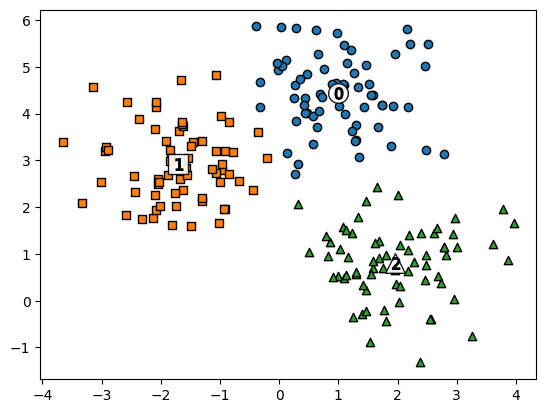

In [ ]:
# KMeans 객체를 이용하여 X 데이터를 K-Means 클러스터링 수행
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=200, random_state=0)
cluster_labels = kmeans.fit_predict(X)
clusterDF['kmeans_label']  = cluster_labels

#cluster_centers_ 는 개별 클러스터의 중심 위치 좌표 시각화를 위해 추출
centers = kmeans.cluster_centers_
unique_labels = np.unique(cluster_labels)
markers=['o', 's', '^', 'P','D','H','x']

# 군집된 label 유형별로 iteration 하면서 marker 별로 scatter plot 수행.
for label in unique_labels:
    label_cluster = clusterDF[clusterDF['kmeans_label']==label]
    center_x_y = centers[label]
    plt.scatter(x=label_cluster['ftr1'], y=label_cluster['ftr2'], edgecolor='k',
                marker=markers[label] )

    # 군집별 중심 위치 좌표 시각화
    plt.scatter(x=center_x_y[0], y=center_x_y[1], s=200, color='white',
                alpha=0.9, edgecolor='k', marker=markers[label])
    plt.scatter(x=center_x_y[0], y=center_x_y[1], s=70, color='k', edgecolor='k',
                marker='$%d$' % label)

plt.show()

In [ ]:
print(clusterDF.groupby('target')['kmeans_label'].value_counts())


target  kmeans_label
0       0               66
        1                1
1       2               67
2       1               65
        2                1
Name: count, dtype: int64


결과를 봐보면 실제 타겟별로 잘 군집화가 이루어 진것을 확인할 수 있다.

## 02. 군집평가

### 실루엣 분석 개요
* 군집화 평가 방법으로 실루엣 분석이 있다. 실루엣 분석은 각 군집 간의 거리가 얼마나 효율저긍로 분리되어 있는지를 나타낸다. 효율적으로 분리됐다는 것은 다른 군집과의 거리는 떨어져 있고 동일 군집끼리의 데이터는 서로 가깝게 잘 뭉쳐있다는 의미.
* 실루엣 분석은 실루엣 계수를 기반으로함.
* 실루엣 계수: 해당 데이터가 같은 군집 내의 데이터와 얼마나 가깝게 군집화돼 있고, 다른 군집에 있는 데이터와는 얼마나 멀리 분리되어 있는지를 나타내는 지표, -1과 1사이의 값을 가지며 1로 가까워 질수록 근처의 군집과 더 멀리 떨어져 있다는 것.
* 실루엣 계수 계산: 해당 데이터 포인트와 같은 군집 내에 있는 다른 데이터 포인트 거리를 평균한 값, 해당 데이터 포인트가 속하지 않은 군집 중 가장 가까운 군집과의 평균거리를 기반으로 계산.
* 좋은 군집화의 조건
  * 전체 실루엣 계수의 평균값 즉 sihouette_score() 값은 0 ~ 1 사이의 값으로 가지며 1에 가까울수록 좋다
  * 전체 실루엣 계수와 더불어 개별 군집의 평균값의 편차가 크지 않아야 한다. 즉 개별 군집의 실루엣 계수 평균값이 전체 실루엣 계수의 평균값에서 크게 벗어나지 않는 것이 중요하다.

### 붓꽃 데이터 세트를 이용한 군집 평가
붓꽆 데이터 세트의 군집화 결과를 실루엣 분석으로 평가 진행
* sklearn.metrics 모듈의 sihouette_score()를 이용
* 붓꽃 데이터 세트의 평균 실루엣 계수는 0.553

In [ ]:
from sklearn.preprocessing import scale
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
# 실루엣 분석 metric 값을 구하기 위한 API 추가
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

%matplotlib inline

iris = load_iris()
feature_names = ['sepal_length','sepal_width','petal_length','petal_width']
irisDF = pd.DataFrame(data=iris.data, columns=feature_names)
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=300,random_state=0).fit(irisDF)

irisDF['cluster'] = kmeans.labels_

# iris 의 모든 개별 데이터에 실루엣 계수값을 구함.
score_samples = silhouette_samples(iris.data, irisDF['cluster'])
print('silhouette_samples( ) return 값의 shape' , score_samples.shape)

# irisDF에 실루엣 계수 컬럼 추가
irisDF['silhouette_coeff'] = score_samples

# 모든 데이터의 평균 실루엣 계수값을 구함.
average_score = silhouette_score(iris.data, irisDF['cluster'])
print('붓꽃 데이터셋 Silhouette Analysis Score:{0:.3f}'.format(average_score))

irisDF.head(3)

silhouette_samples( ) return 값의 shape (150,)
붓꽃 데이터셋 Silhouette Analysis Score:0.553


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


,sepal_length,sepal_width,petal_length,petal_width,cluster,silhouette_coeff
0,5.1,3.5,1.4,0.2,1,0.852955
1,4.9,3.0,1.4,0.2,1,0.815495
2,4.7,3.2,1.3,0.2,1,0.829315


군집별 평균 실루엣 계수 값을 확인 -> group by 하여 silhouette_coeff 칼럼의 평균값을 구함

In [ ]:
irisDF.groupby('cluster')['silhouette_coeff'].mean()


cluster
0    0.417320
1    0.798140
2    0.451105
Name: silhouette_coeff, dtype: float64

### 군집별 평균 실루엣 계수의 시각화를 통한 군집 개수 최적화 방법
전체 데이터의 평균 실루엣 계수가 높다고 해서 반드시 최적의 군집 개수로 군집화가 잘 됐다고 볼 수 없다. -> 특정 군집 내의 실루엣 계수만 너무 높고 다른 군집은 내부 데이터 끼리 거리가 너무 떨어져 있어도 평균값으로 높은 값을 가질 수 있다.

In [ ]:
### 여러개의 클러스터링 갯수를 List로 입력 받아 각각의 실루엣 계수를 면적으로 시각화한 함수 작성
def visualize_silhouette(cluster_lists, X_features):

    from sklearn.datasets import make_blobs
    from sklearn.cluster import KMeans
    from sklearn.metrics import silhouette_samples, silhouette_score

    import matplotlib.pyplot as plt
    import matplotlib.cm as cm
    import math

    # 입력값으로 클러스터링 갯수들을 리스트로 받아서, 각 갯수별로 클러스터링을 적용하고 실루엣 개수를 구함
    n_cols = len(cluster_lists)

    # plt.subplots()으로 리스트에 기재된 클러스터링 수만큼의 sub figures를 가지는 axs 생성
    fig, axs = plt.subplots(figsize=(4*n_cols, 4), nrows=1, ncols=n_cols)

    # 리스트에 기재된 클러스터링 갯수들을 차례로 iteration 수행하면서 실루엣 개수 시각화
    for ind, n_cluster in enumerate(cluster_lists):

        # KMeans 클러스터링 수행하고, 실루엣 스코어와 개별 데이터의 실루엣 값 계산.
        clusterer = KMeans(n_clusters = n_cluster, max_iter=500, random_state=0)
        cluster_labels = clusterer.fit_predict(X_features)

        sil_avg = silhouette_score(X_features, cluster_labels)
        sil_values = silhouette_samples(X_features, cluster_labels)

        y_lower = 10
        axs[ind].set_title('Number of Cluster : '+ str(n_cluster)+'\n' \
                          'Silhouette Score :' + str(round(sil_avg,3)) )
        axs[ind].set_xlabel("The silhouette coefficient values")
        axs[ind].set_ylabel("Cluster label")
        axs[ind].set_xlim([-0.1, 1])
        axs[ind].set_ylim([0, len(X_features) + (n_cluster + 1) * 10])
        axs[ind].set_yticks([])  # Clear the yaxis labels / ticks
        axs[ind].set_xticks([0, 0.2, 0.4, 0.6, 0.8, 1])

        # 클러스터링 갯수별로 fill_betweenx( )형태의 막대 그래프 표현.
        for i in range(n_cluster):
            ith_cluster_sil_values = sil_values[cluster_labels==i]
            ith_cluster_sil_values.sort()

            size_cluster_i = ith_cluster_sil_values.shape[0]
            y_upper = y_lower + size_cluster_i

            color = cm.nipy_spectral(float(i) / n_cluster)
            axs[ind].fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_sil_values, \
                                facecolor=color, edgecolor=color, alpha=0.7)
            axs[ind].text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
            y_lower = y_upper + 10

        axs[ind].axvline(x=sil_avg, color="red", linestyle="--")

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


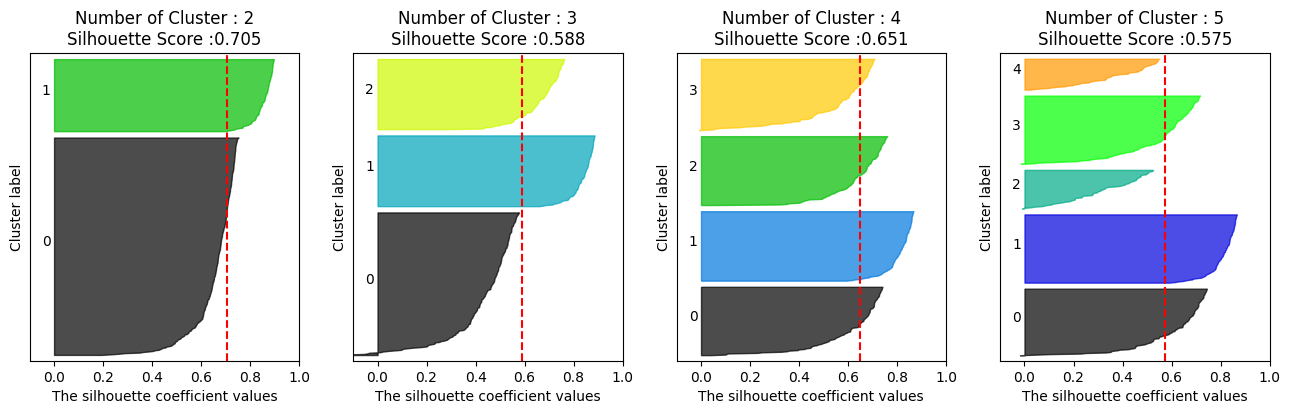

In [ ]:
# make_blobs 을 통해 clustering 을 위한 4개의 클러스터 중심의 500개 2차원 데이터 셋 생성
from sklearn.datasets import make_blobs
X, y = make_blobs(n_samples=500, n_features=2, centers=4, cluster_std=1, \
                  center_box=(-10.0, 10.0), shuffle=True, random_state=1)

# cluster 개수를 2개, 3개, 4개, 5개 일때의 클러스터별 실루엣 계수 평균값을 시각화
visualize_silhouette([ 2, 3, 4, 5], X)

* 첫번째 경우 군집의 개수가 2개를 정했을때. 이때의 실루엣 계수는 0.705로 높은 값. 하지만 클러스터 0 같은 경우는 평균 실루엣 값 보다 절반 이상이 적은 실루엣 계수를 가지고 있음
* 두번째의 경우 군집의 계수가 3개일때. 이 경우 전체 데이터의 평균 실루엣 계수는 0.588. 1,2 번 군집은 평균보다 높은 실루엣 계수를 가지고 있지만 0번 계수는 평균보다 적음
* 군집이 4개인 경우 평균 실루엣 값은 0.65, 그리고 개별 군집의 평균 실루엣 값이 비교적 균일하게 위치 -> 이상적인 군집화 갯수는 4개

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


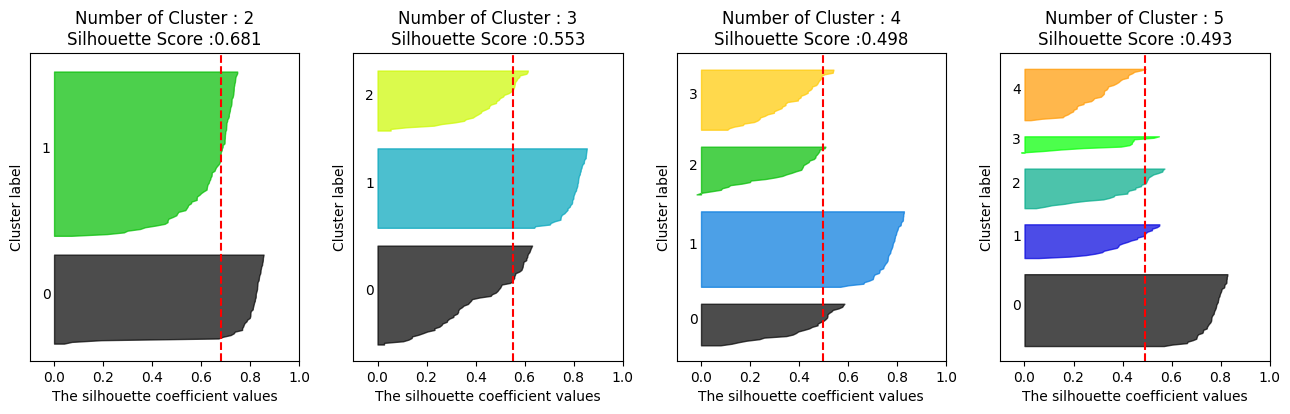

In [ ]:
from sklearn.datasets import load_iris

iris=load_iris()
visualize_silhouette([ 2, 3, 4,5 ], iris.data)

## 03. 평균 이동
* 평균 이동은 k 평균과 유사하게 중심을 군집의 중심으로 지속적으로 움직이면서 군집화를 수행. 하지만 k 평균은 평균 거리 중심으로 이동하는데 반해 평균 이동은 중심을 데이터가 모여있는 밀도가 가장 높은곳으로 이동시킴
* 평균 이동 군집화는 데이터의 분포도를 이용해 군집 중심점을 찾는다. 군집 중심점은 확률 밀도 함수를 이용한다. 가장 집중적으로 데이터가 모여있어 확률 밀도 함수가 피크인 점을 중심점으로 선정하며, 일반적으로 주어진 모델의 확률 밀도 함수를 찾기 위해 KDE 를 이용
* 평균 이동 군집화는 특정 데이터를 반경 내의 데이터 분포 확률 밀도가 가장 높은 곳으로 이동하기 위해 주변 데이터와 거리 값을 KDE 함수 값으로 입력한 뒤 그 반환 값을 현재 위치에서 업데이트 하면서 이동하는 방식을 취한다.

* KDE 는 커널 함수를 통해 어떤 변수의 확률 밀도 함수를 추정하는 대표적인 방법. 관측된 데이터 각각에  커널 함수를 적용한 값을 모두 더한 뒤 데이터 건수로 나눠 확률 밀도 함수를 추청.
* PDF는 확률 변수의 분포를 나타내는 함수로, 널리 알려진 정규분포 함수를 포함해 감마분포, T-분포 등이 있다.
* KDE 는 개별 관측 데이터에 커널 함수를 적용한 뒤 이 적용 값을 모두 더한 후 개별 데이터의 건수로 나눠 확률 밀도 함수를 추청하며, 대표적인 커널함수로써 가우시안 분포 함수를 사용
* 대역폭h 는 형태를 부드러운 형태로 평활화 하는데 적용 -> 일반적으로 대역폭이 크면 평활화된 kde 로 적은 군집수, 대역폭이 적으면 뾰족한 kde 로 많은 군집 수를 가진다.

최적의 대역폭 계산을 위해 estimate_bandwidth() 함수를 제공
  * cluster_std=0.7 로 정한 3개의 군집 데이터에 대해 bandwidth 를 0.8로 설정한 평균 이동 군집화 알고리즘 적용 예제

In [ ]:
import numpy as np
from sklearn.datasets import make_blobs
from sklearn.cluster import MeanShift

X, y = make_blobs(n_samples=200, n_features=2, centers=3,
                  cluster_std=0.7, random_state=0)

meanshift= MeanShift(bandwidth=0.8)
cluster_labels = meanshift.fit_predict(X)
print('cluster labels 유형:', np.unique(cluster_labels))

cluster labels 유형: [0 1 2 3 4 5]


 bandwidth 를 1.0으로 해서 meanshift 진행

In [ ]:
meanshift= MeanShift(bandwidth=1)
cluster_labels = meanshift.fit_predict(X)
print('cluster labels 유형:', np.unique(cluster_labels))

cluster labels 유형: [0 1 2]


최적화된 bandwitch 값을 찾기 위해 estimate_bandwidth() 함수를 제공.

In [ ]:
from sklearn.cluster import estimate_bandwidth

bandwidth = estimate_bandwidth(X)
print('bandwidth 값:', round(bandwidth,3))

bandwidth 값: 1.816


측정된 bandwidth 값을 평균 이동 입력값으로 적용해 동일한 make_blobs() 데이터 세트에 군집화 수행

In [ ]:
import pandas as pd


clusterDF = pd.DataFrame(data=X, columns=['ftr1', 'ftr2'])
clusterDF['target'] = y

# estimate_bandwidth()로 최적의 bandwidth 계산
best_bandwidth = estimate_bandwidth(X)

meanshift= MeanShift(bandwidth=best_bandwidth)
cluster_labels = meanshift.fit_predict(X)
print('cluster labels 유형:',np.unique(cluster_labels))

cluster labels 유형: [0 1 2]


군집화된 3개의 군집을 시각화

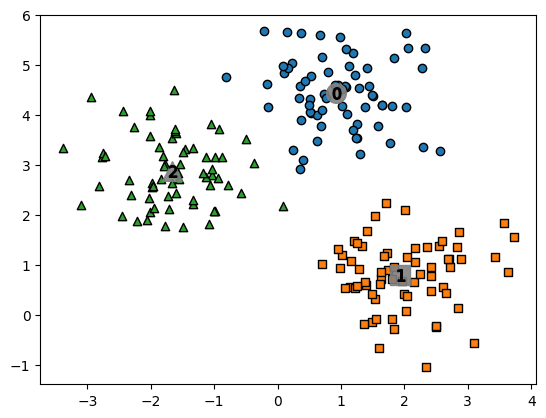

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

clusterDF['meanshift_label']  = cluster_labels
centers = meanshift.cluster_centers_
unique_labels = np.unique(cluster_labels)
markers=['o', 's', '^', 'x', '*']

for label in unique_labels:
    label_cluster = clusterDF[clusterDF['meanshift_label']==label]
    center_x_y = centers[label]
    # 군집별로 다른 마커로 산점도 적용
    plt.scatter(x=label_cluster['ftr1'], y=label_cluster['ftr2'], edgecolor='k', marker=markers[label] )

    # 군집별 중심 표현
    plt.scatter(x=center_x_y[0], y=center_x_y[1], s=200, color='gray', alpha=0.9, marker=markers[label])
    plt.scatter(x=center_x_y[0], y=center_x_y[1], s=70, color='k', edgecolor='k', marker='$%d$' % label)

plt.show()

In [ ]:
print(clusterDF.groupby('target')['meanshift_label'].value_counts())


target  meanshift_label
0       0                  67
1       1                  67
2       2                  66
Name: count, dtype: int64


군집이 잘 이루어 진것을 확인할 수 있다.

## 04. GMM

### GMM 소개
GMM 군집화는 군집화를 적용하고자 하는 데이터가 여러개의 가우시안 분포를 가진 데이터 집합들이 섞여서 생성된 것이라는 가정하에 군집화를 수행하는 방식.
* GMM 은 데이터를 여러 개의 가우시안 분포가 섞인 것으로 간주, 섞인 데이터 분포에서 개별 유형의 가우시안 분포를 추출한다.
* GMM 에서의 모수 추청
  * 개별 정규 분포의 평균과 분산
  * 각 데이터가 어떤 정규 분포에 해당되는지의 확률
  * 이런 모수 추정을 위해 EM 방법을 적용 -> gaussianmixture 클래스를 지원

## GMM 을 이용한 붓꽃 데이터 세트 군집화
GMM 은 확률 기반 군집화 이고, K 평균은 거리 기반 군집화 이다.
* 붓꽃 데이터 세트로 이 두가지 방식을 이용해 군집호 ㅏ수행한 뒤 양쪽 방식 비교 진행

In [ ]:
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline

iris = load_iris()
feature_names = ['sepal_length','sepal_width','petal_length','petal_width']

# 보다 편리한 데이타 Handling을 위해 DataFrame으로 변환
irisDF = pd.DataFrame(data=iris.data, columns=feature_names)
irisDF['target'] = iris.target

* n_components -> gaussian mixture 모델의 총 개수. k 평균의 n cluster와 같이 군집의 개수를 정하는데 중요한 역할을 수행 -> 3으로 설정하고 군집화를 진행
* 클러스터링 결과를 irisDF 의 'gmm_cluster' 컬럼명으로 저장하고 target 값에 따라서 gmm_cluster 값이 어떻게 매핑되었는지 확인

In [ ]:
from sklearn.mixture import GaussianMixture

gmm = GaussianMixture(n_components=3, random_state=0).fit(iris.data)
gmm_cluster_labels = gmm.predict(iris.data)

# 클러스터링 결과를 irisDF 의 'gmm_cluster' 컬럼명으로 저장
irisDF['gmm_cluster'] = gmm_cluster_labels
irisDF['target'] = iris.target

# target 값에 따라서 gmm_cluster 값이 어떻게 매핑되었는지 확인.
iris_result = irisDF.groupby(['target'])['gmm_cluster'].value_counts()
print(iris_result)

target  gmm_cluster
0       0              50
1       2              45
        1               5
2       1              50
Name: count, dtype: int64


결과를 확인해보녀 이전 k평균 군집화 결과보다 더 효과적인 분류 결과가 도출되었다.
* 다음으로 k 평균 군집화 수해 결과를 확인

In [ ]:
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=300,random_state=0).fit(iris.data)
kmeans_cluster_labels = kmeans.predict(iris.data)
irisDF['kmeans_cluster'] = kmeans_cluster_labels
iris_result = irisDF.groupby(['target'])['kmeans_cluster'].value_counts()
print(iris_result)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


target  kmeans_cluster
0       1                 50
1       0                 48
        2                  2
2       2                 36
        0                 14
Name: count, dtype: int64


### GMM과 K 평균의 비교

In [ ]:
### 클러스터 결과를 담은 DataFrame과 사이킷런의 Cluster 객체등을 인자로 받아 클러스터링 결과를 시각화하는 함수
def visualize_cluster_plot(clusterobj, dataframe, label_name, iscenter=True):
    if iscenter :
        centers = clusterobj.cluster_centers_

    unique_labels = np.unique(dataframe[label_name].values)
    markers=['o', 's', '^', 'x', '*']
    isNoise=False

    for label in unique_labels:
        label_cluster = dataframe[dataframe[label_name]==label]
        if label == -1:
            cluster_legend = 'Noise'
            isNoise=True
        else :
            cluster_legend = 'Cluster '+str(label)

        plt.scatter(x=label_cluster['ftr1'], y=label_cluster['ftr2'], s=70,\
                    edgecolor='k', marker=markers[label], label=cluster_legend)

        if iscenter:
            center_x_y = centers[label]
            plt.scatter(x=center_x_y[0], y=center_x_y[1], s=250, color='white',
                        alpha=0.9, edgecolor='k', marker=markers[label])
            plt.scatter(x=center_x_y[0], y=center_x_y[1], s=70, color='k',\
                        edgecolor='k', marker='$%d$' % label)
    if isNoise:
        legend_loc='upper center'
    else: legend_loc='upper right'

    plt.legend(loc=legend_loc)
    plt.show()

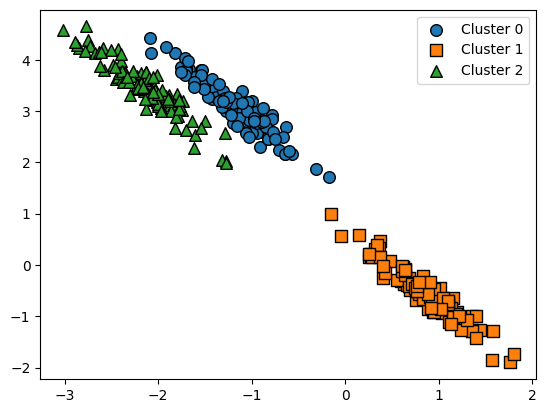

In [ ]:
from sklearn.datasets import make_blobs

# make_blobs() 로 300개의 데이터 셋, 3개의 cluster 셋, cluster_std=0.5 을 만듬.
X, y = make_blobs(n_samples=300, n_features=2, centers=3, cluster_std=0.5, random_state=0)

# 길게 늘어난 타원형의 데이터 셋을 생성하기 위해 변환함.
transformation = [[0.60834549, -0.63667341], [-0.40887718, 0.85253229]]
X_aniso = np.dot(X, transformation)
# feature 데이터 셋과 make_blobs( ) 의 y 결과 값을 DataFrame으로 저장
clusterDF = pd.DataFrame(data=X_aniso, columns=['ftr1', 'ftr2'])
clusterDF['target'] = y
# 생성된 데이터 셋을 target 별로 다른 marker 로 표시하여 시각화 함.
visualize_cluster_plot(None, clusterDF, 'target', iscenter=False)
plt.show()

위와 같이 원형의 범위로 구성된 데이터가 아닌 경우에는 어떻게 KMEANS 알고리즘은 어떻게 군집화 하는지 시험 진행

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


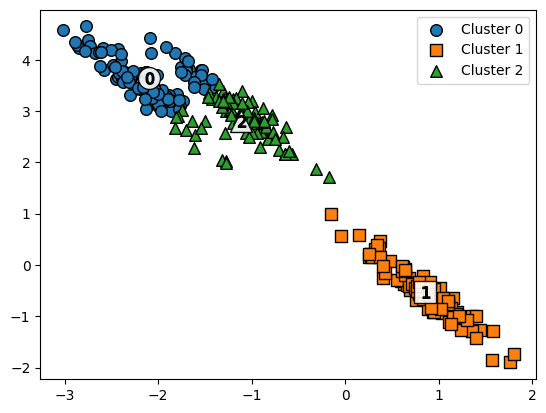

<Figure size 640x480 with 0 Axes>

In [ ]:
# 3개의 Cluster 기반 Kmeans 를 X_aniso 데이터 셋에 적용
kmeans = KMeans(3, random_state=0)
kmeans_label = kmeans.fit_predict(X_aniso)
clusterDF['kmeans_label'] = kmeans_label

fig2 = plt.gcf()
visualize_cluster_plot(kmeans, clusterDF, 'kmeans_label',iscenter=True)
plt.draw()
fig2.savefig('p457b_cluster_number.tif', format='tif', dpi=300, bbox_inches='tight')

KMEANS 로 군집화를 진행할 경우 주로 원형 영역의 위치로 개별 군집화가 되면서 원하는 방향으로 구성되지 않음을 알 수 있다. KMEANS 가 거리 기반으로 군집화를 수행하므로 같은 거리상 원형으로 군집을 구성하면서 위오 ㅏ같이 길쭉한 방향으로 밀접해 있을 경우에는 최적의 군집화가어렵다.
* 이번에는 GMM 으로 군집화를 진행

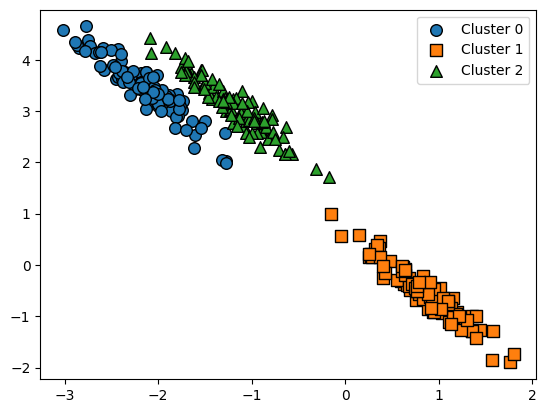

<Figure size 640x480 with 0 Axes>

In [ ]:
# 3개의 n_components기반 GMM을 X_aniso 데이터 셋에 적용
gmm = GaussianMixture(n_components=3, random_state=0)
gmm_label = gmm.fit(X_aniso).predict(X_aniso)
clusterDF['gmm_label'] = gmm_label

# GaussianMixture는 cluster_centers_ 속성이 없으므로 iscenter를 False로 설정.
fig3 = plt.gcf()
visualize_cluster_plot(gmm, clusterDF, 'gmm_label',iscenter=False)
plt.draw()
fig3.savefig('p458_cluster_gmm.tif', format='tif', dpi=300, bbox_inches='tight')

결과를 보면 군집이 잘 형성된 것을 확인할 수 있다. 아래의 결과에서도 군집화 효율에서 GMM 이 높은 군집 효율을 나타내는 것을 확인할 수 있다.

In [ ]:
print('### KMeans Clustering ###')
print(clusterDF.groupby('target')['kmeans_label'].value_counts())
print('\n### Gaussian Mixture Clustering ###')
print(clusterDF.groupby('target')['gmm_label'].value_counts())

### KMeans Clustering ###
target  kmeans_label
0       2                73
        0                27
1       1               100
2       0                86
        2                14
Name: count, dtype: int64

### Gaussian Mixture Clustering ###
target  gmm_label
0       2            100
1       1            100
2       0            100
Name: count, dtype: int64


## 05. DBSCAN

### DBSCAN 개요
* DBSCAN은 간단하고 직관적인 알고리즘으로 데이터의 분포가 기하학적으로 복잡한 데이터 세트에도 효과적인 군집화가 가능하다.
* 내무의 원 모양과 외부의 원 모양 형태의 분포를 가진 데이터 세트를 군집화한다 했을때, GMM, KMEANS 으로는 군집화를 수행하기가 어렵다.
  * 입실론 주변 영역: 개별 데이터를 중심으로 입실론 반경을 가지는 원형의 영역
  * 최소 데이터 개수: 개별 데이터의 입실론 주변 영역에 포함되는 타 데이터의 개수

* 입실론 주변 영역 내에 포함되는 최소 데이터 개수를 충족시키는가 아닌가에 따라 데이터 포인트를 다음과 같이 정의
  * 핵심 포인트: 주변 영역 내의 최소 데이터 개수 이상의 타 데이터를 가지고 있을 경우 해당 데이터를 핵심포인트라 정의
  * 이웃 포인트: 주변 영역 내에 위치한 타 데이터를 이웃 포인트라 한다.
  * 경계 포인트: 주변 영역 내에 최소 데이터의 개수 이상의 이웃 포인트를 가지고 있지 않지만 핵심 포인트를 이웃 포인트로 가지고 있는 데이터를 경계 포인트라 함
  * 잡음 포인트: 최소 데이터 개수 이상의 이웃 포인트를 가지고 있지 않으며 핵심 포인트도 이웃 포인트로 가지고 있지 않는 데이터를 잡음 포인트라 한다.

### DBSCAN 적용하기 - 붓꽃데이터 세트
DBSCAN 클래스를 이용해 붓꽃 데이터 세트를 군집화.
* eps = 0.6, min_smaples=8로 지정

In [ ]:
from sklearn.datasets import load_iris

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline

iris = load_iris()
feature_names = ['sepal_length','sepal_width','petal_length','petal_width']

# 보다 편리한 데이타 Handling을 위해 DataFrame으로 변환
irisDF = pd.DataFrame(data=iris.data, columns=feature_names)
irisDF['target'] = iris.target

In [ ]:
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=0.6, min_samples=8, metric='euclidean')
dbscan_labels = dbscan.fit_predict(iris.data)

irisDF['dbscan_cluster'] = dbscan_labels
irisDF['target'] = iris.target

iris_result = irisDF.groupby(['target'])['dbscan_cluster'].value_counts()
print(iris_result)

target  dbscan_cluster
0        0                49
        -1                 1
1        1                46
        -1                 4
2        1                42
        -1                 8
Name: count, dtype: int64


결과를 확인해보면 0,1 외에 특이하게 -1 이 있는 것을 확인할 수 있다. -1 인것은 노이즈에 속하는 군집을 의미.
* DBSCAN 으로 군집화 데이터 세트를 2차원 평면에서 표현하기 위해 PCA 를 이용하여 차원 축소 진행, 이후 시각화

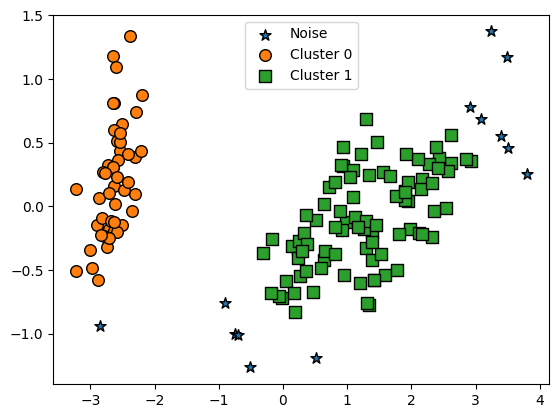

In [ ]:
from sklearn.decomposition import PCA
# 2차원으로 시각화하기 위해 PCA n_componets=2로 피처 데이터 세트 변환
pca = PCA(n_components=2, random_state=0)
pca_transformed = pca.fit_transform(iris.data)
# visualize_cluster_2d( ) 함수는 ftr1, ftr2 컬럼을 좌표에 표현하므로 PCA 변환값을 해당 컬럼으로 생성
irisDF['ftr1'] = pca_transformed[:,0]
irisDF['ftr2'] = pca_transformed[:,1]

visualize_cluster_plot(dbscan, irisDF, 'dbscan_cluster', iscenter=False)

eps 를 기존의 0.6에서 0.8로 증가시키면 노이즈 데이터 수가 줄어든다. (13개 -> 3개)

target  dbscan_cluster
0        0                50
1        1                50
2        1                47
        -1                 3
Name: count, dtype: int64


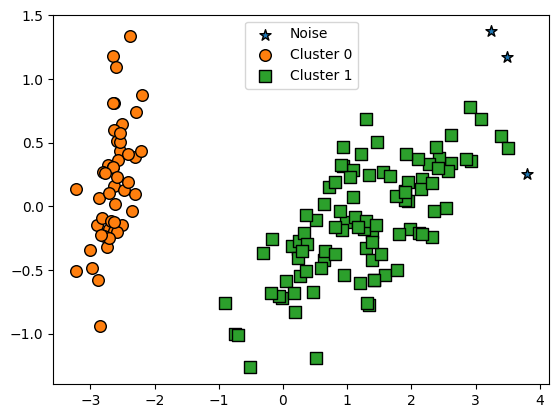

In [ ]:
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=0.8, min_samples=8, metric='euclidean')
dbscan_labels = dbscan.fit_predict(iris.data)

irisDF['dbscan_cluster'] = dbscan_labels
irisDF['target'] = iris.target

iris_result = irisDF.groupby(['target'])['dbscan_cluster'].value_counts()
print(iris_result)

visualize_cluster_plot(dbscan, irisDF, 'dbscan_cluster', iscenter=False)

이번에는  eps 기존 0.6으로 유지하고 min_samples 를 16으로 증가.

target  dbscan_cluster
0        0                48
        -1                 2
1        1                44
        -1                 6
2        1                36
        -1                14
Name: count, dtype: int64


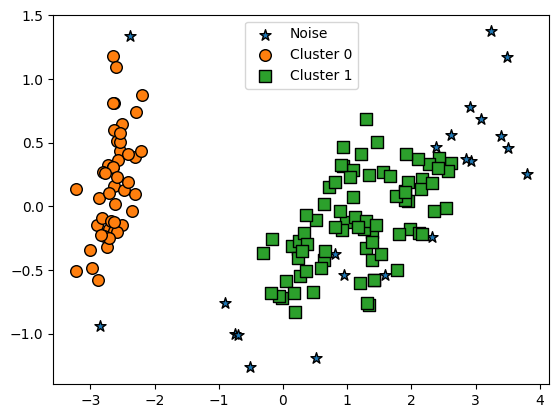

In [ ]:
dbscan = DBSCAN(eps=0.6, min_samples=16, metric='euclidean')
dbscan_labels = dbscan.fit_predict(iris.data)

irisDF['dbscan_cluster'] = dbscan_labels
irisDF['target'] = iris.target

iris_result = irisDF.groupby(['target'])['dbscan_cluster'].value_counts()
print(iris_result)

visualize_cluster_plot(dbscan, irisDF, 'dbscan_cluster', iscenter=False)

### DBSCAN 적용하기 - make_circles() 데이터 세트
* 데이터 생성



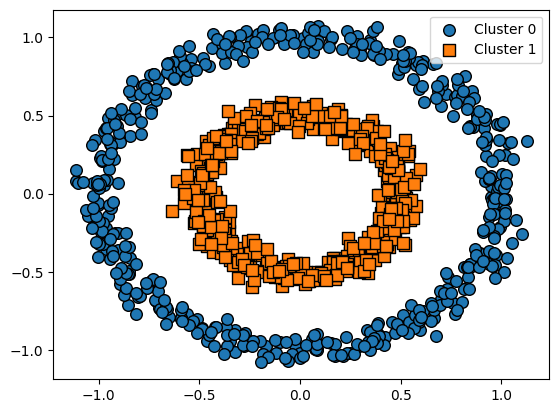

In [ ]:
from sklearn.datasets import make_circles

X, y = make_circles(n_samples=1000, shuffle=True, noise=0.05, random_state=0, factor=0.5)
clusterDF = pd.DataFrame(data=X, columns=['ftr1', 'ftr2'])
clusterDF['target'] = y

visualize_cluster_plot(None, clusterDF, 'target', iscenter=False)

kmeans 알고리즘으로 군집화 진행

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


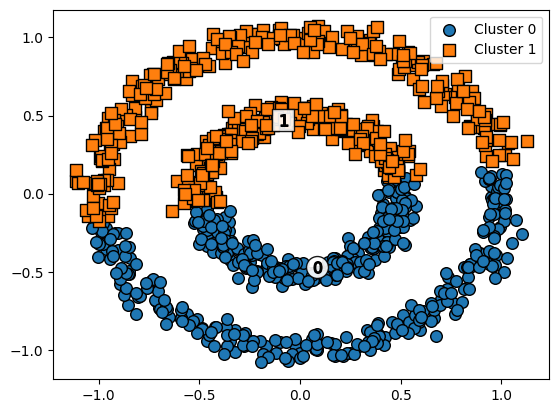

In [ ]:
# KMeans로 make_circles( ) 데이터 셋을 클러스터링 수행.
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=2, max_iter=1000, random_state=0)
kmeans_labels = kmeans.fit_predict(X)
clusterDF['kmeans_cluster'] = kmeans_labels

visualize_cluster_plot(kmeans, clusterDF, 'kmeans_cluster', iscenter=True)

GMM 으로 군집화 진행

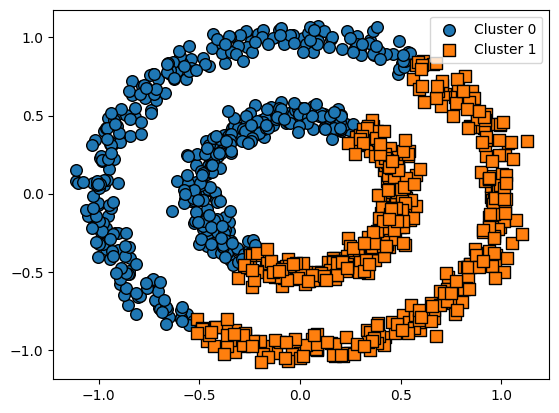

In [ ]:
# GMM으로 make_circles( ) 데이터 셋을 클러스터링 수행.
from sklearn.mixture import GaussianMixture

gmm = GaussianMixture(n_components=2, random_state=0)
gmm_label = gmm.fit(X).predict(X)
clusterDF['gmm_cluster'] = gmm_label

visualize_cluster_plot(gmm, clusterDF, 'gmm_cluster', iscenter=False)

DBSCAN 으로 군집화 진행

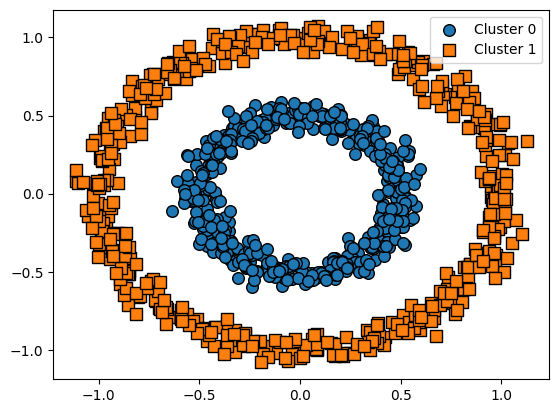

In [ ]:
# DBSCAN으로 make_circles( ) 데이터 셋을 클러스터링 수행.
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=0.2, min_samples=10, metric='euclidean')
dbscan_labels = dbscan.fit_predict(X)
clusterDF['dbscan_cluster'] = dbscan_labels

visualize_cluster_plot(dbscan, clusterDF, 'dbscan_cluster', iscenter=False)

## 06. 군집화 실습 - 고객 세그멘테이션

### 고객 세크먼테이션의 정의와 기법
* 고객 세그먼테이션: 다양한 기준으로 고객을 분류하는 기법
* 기본적 고객분석요소인 RFM 기법을 이용
  * RECENCY: 가장 최근 상품 구입 일에서 오늘까지의 시간
  * FREQUENCY: 상품 구매 횟수
  * MONETARY VALUE: 총 구매 금액

### 데이터 세트 로딩과 데이터 클렌징

In [ ]:
import pandas as pd
import datetime
import math
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# 엑셀 파일을 읽어오기
file_path = '/content/Online Retail.xlsx'
retail_df = pd.read_excel(io=file_path)

# 데이터프레임의 처음 3줄을 출력
retail_df.head(3)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom


데이터 세트의 전체 건수, 칼럼타입, NULL 개수 확인 진행

In [ ]:
retail_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


확인해본 결과 customerid의 null 값이 너무 많다. 그 외에 다른 칼럼의 경우도 오류 데이터가 존재한다. 따라서 데이터 세트는 먼저 사전 정제 작업이 필요하다.
  * null 데이터 제거: 고객 식별 번호가 없는 데이터는 필요가 없기에 삭제한다.
  * 오류 데이터 삭제: 대표적인 오류 데이터는 Quantity 또는 UnitPrice 가 0보다 적은 경우이다. 이 경우 InvoiceNo 의 앞자리는 C로 되어있다. 분석의 효율성을 위해 이 데이터는 모두 삭제한다.
불린 인덱싱을 적용해 Quantity > 0 , UnitPrice > 0 이고, CustomerID이 NOT NULL 인 값만 다시 필터링 진행

In [ ]:
retail_df = retail_df[retail_df['Quantity'] > 0]
retail_df = retail_df[retail_df['UnitPrice'] > 0]
retail_df = retail_df[retail_df['CustomerID'].notnull()]
print(retail_df.shape)
retail_df.isnull().sum()

(397884, 8)


InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

필터링 후 전체 데이터가 541909 -> 397884로 줄었음.
영국 외의 다른 국가의 데이터는 모두 제외

In [ ]:
retail_df['Country'].value_counts()[:5]


Country
United Kingdom    354321
Germany             9040
France              8341
EIRE                7236
Spain               2484
Name: count, dtype: int64

### RFM 기반 데이터 가공
Unitprice 와 Quantity를 곱해서 주문 금액 데이터를 생성. 그리고 CustomerNo 도 더 편리한 식별성을 위해 float 형을 int 형으로 변경

In [ ]:
retail_df['sale_amount'] = retail_df['Quantity'] * retail_df['UnitPrice']
retail_df['CustomerID'] = retail_df['CustomerID'].astype(int)

top-5 주문 건수와 주문 금액을 가진 고객 데이터를 추출

In [ ]:
print(retail_df['CustomerID'].value_counts().head(5))
print(retail_df.groupby('CustomerID')['sale_amount'].sum().sort_values(ascending=False)[:5])

CustomerID
17841    7847
14911    5675
14096    5111
12748    4595
14606    2700
Name: count, dtype: int64
CustomerID
14646    280206.02
18102    259657.30
17450    194550.79
16446    168472.50
14911    143825.06
Name: sale_amount, dtype: float64


In [ ]:
# DataFrame의 groupby() 의 multiple 연산을 위해 agg() 이용
# Recency는 InvoiceDate 컬럼의 max() 에서 데이터 가공
# Frequency는 InvoiceNo 컬럼의 count() , Monetary value는 sale_amount 컬럼의 sum()
aggregations = {
    'InvoiceDate': 'max',
    'InvoiceNo': 'count',
    'sale_amount':'sum'
}
cust_df = retail_df.groupby('CustomerID').agg(aggregations)
# groupby된 결과 컬럼값을 Recency, Frequency, Monetary로 변경
cust_df = cust_df.rename(columns = {'InvoiceDate':'Recency',
                                    'InvoiceNo':'Frequency',
                                    'sale_amount':'Monetary'
                                   }
                        )
cust_df = cust_df.reset_index()
cust_df.head(3)

,CustomerID,Recency,Frequency,Monetary
0,12346,2011-01-18 10:01:00,1,77183.60
1,12347,2011-12-07 15:52:00,182,4310.00
2,12348,2011-09-25 13:13:00,31,1797.24


In [ ]:
import datetime as dt

cust_df['Recency'] = dt.datetime(2011,12,10) - cust_df['Recency']
cust_df['Recency'] = cust_df['Recency'].apply(lambda x: x.days+1)
print('cust_df 로우와 컬럼 건수는 ',cust_df.shape)
cust_df.head(3)

cust_df 로우와 컬럼 건수는  (4338, 4)


,CustomerID,Recency,Frequency,Monetary
0,12346,326,1,77183.60
1,12347,3,182,4310.00
2,12348,76,31,1797.24


### RFM 기반 고객 세그먼테이션
Recency, Frequency, Monetary 칼럼들을 hist() 를 이용하여 각 칼럼 값 분포도를 확인
* Frequency, Monetary 칼럼의 데이터가 왜곡 정도가 심한 것을 확인할 수 있다.

(array([4.303e+03, 1.800e+01, 9.000e+00, 1.000e+00, 2.000e+00, 1.000e+00,
        2.000e+00, 0.000e+00, 0.000e+00, 2.000e+00]),
 array([3.75000000e+00, 2.80239770e+04, 5.60442040e+04, 8.40644310e+04,
        1.12084658e+05, 1.40104885e+05, 1.68125112e+05, 1.96145339e+05,
        2.24165566e+05, 2.52185793e+05, 2.80206020e+05]),
 <BarContainer object of 10 artists>)

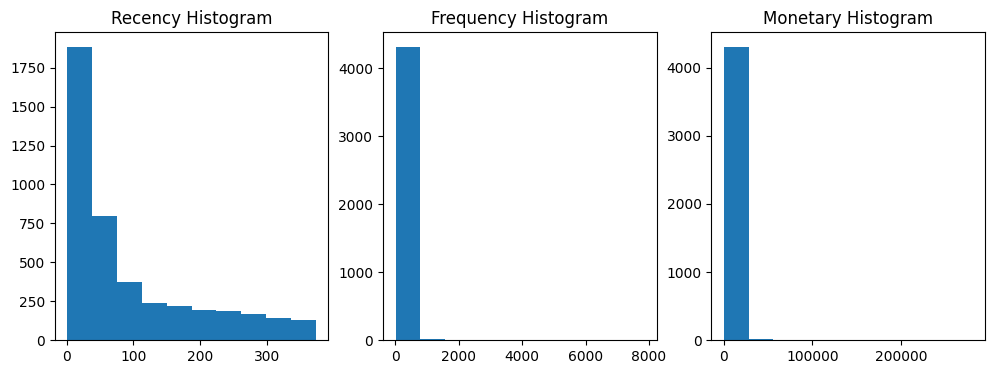

In [ ]:
fig, (ax1,ax2,ax3) = plt.subplots(figsize=(12,4), nrows=1, ncols=3)
ax1.set_title('Recency Histogram')
ax1.hist(cust_df['Recency'])

ax2.set_title('Frequency Histogram')
ax2.hist(cust_df['Frequency'])

ax3.set_title('Monetary Histogram')
ax3.hist(cust_df['Monetary'])

In [ ]:
cust_df[['Recency','Frequency','Monetary']].describe()


,Recency,Frequency,Monetary
count,4338.000000,4338.000000,4338.000000
mean,93.059474,91.720609,2054.266460
std,100.012264,228.785094,8989.230441
min,1.000000,1.000000,3.750000
25%,18.000000,17.000000,307.415000
50%,51.000000,41.000000,674.485000
75%,142.750000,100.000000,1661.740000
max,374.000000,7847.000000,280206.020000


* 각 칼럼별 데이터 값 백분위 값으로도 Frequency, Monetary 칼럼의 데이터가 왜곡 정도가 심하다는 것을 알 수 있다.
* 왜곡 정도가 매우 높은 데이터 세트에 k 평균 군집을 적용하면 중심의 개수를 증가시켜도 변별럭이 떨어지는 군집화가 수앻된다. 먼저 데이터를 표준화로 재조정한뒤 k 평균을 진행

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, silhouette_samples

X_features = cust_df[['Recency','Frequency','Monetary']].values
X_features_scaled = StandardScaler().fit_transform(X_features)

kmeans = KMeans(n_clusters=3, random_state=0)
labels = kmeans.fit_predict(X_features_scaled)
cust_df['cluster_label'] = labels

print('실루엣 스코어는 : {0:.3f}'.format(silhouette_score(X_features_scaled,labels)))

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


실루엣 스코어는 : 0.602


군집 개수를 2~5개까지 변화시키면서 개별 군집의 실루엣 계수 값과 데이터 구성을 확인

In [ ]:
### 여러개의 클러스터링 갯수를 List로 입력 받아 각각의 실루엣 계수를 면적으로 시각화한 함수 작성
def visualize_silhouette(cluster_lists, X_features):

    from sklearn.datasets import make_blobs
    from sklearn.cluster import KMeans
    from sklearn.metrics import silhouette_samples, silhouette_score

    import matplotlib.pyplot as plt
    import matplotlib.cm as cm
    import math

    # 입력값으로 클러스터링 갯수들을 리스트로 받아서, 각 갯수별로 클러스터링을 적용하고 실루엣 개수를 구함
    n_cols = len(cluster_lists)

    # plt.subplots()으로 리스트에 기재된 클러스터링 만큼의 sub figures를 가지는 axs 생성
    fig, axs = plt.subplots(figsize=(4*n_cols, 4), nrows=1, ncols=n_cols)

    # 리스트에 기재된 클러스터링 갯수들을 차례로 iteration 수행하면서 실루엣 개수 시각화
    for ind, n_cluster in enumerate(cluster_lists):

        # KMeans 클러스터링 수행하고, 실루엣 스코어와 개별 데이터의 실루엣 값 계산.
        clusterer = KMeans(n_clusters = n_cluster, max_iter=500, random_state=0)
        cluster_labels = clusterer.fit_predict(X_features)

        sil_avg = silhouette_score(X_features, cluster_labels)
        sil_values = silhouette_samples(X_features, cluster_labels)

        y_lower = 10
        axs[ind].set_title('Number of Cluster : '+ str(n_cluster)+'\n' \
                          'Silhouette Score :' + str(round(sil_avg,3)) )
        axs[ind].set_xlabel("The silhouette coefficient values")
        axs[ind].set_ylabel("Cluster label")
        axs[ind].set_xlim([-0.1, 1])
        axs[ind].set_ylim([0, len(X_features) + (n_cluster + 1) * 10])
        axs[ind].set_yticks([])  # Clear the yaxis labels / ticks
        axs[ind].set_xticks([0, 0.2, 0.4, 0.6, 0.8, 1])

        # 클러스터링 갯수별로 fill_betweenx( )형태의 막대 그래프 표현.
        for i in range(n_cluster):
            ith_cluster_sil_values = sil_values[cluster_labels==i]
            ith_cluster_sil_values.sort()

            size_cluster_i = ith_cluster_sil_values.shape[0]
            y_upper = y_lower + size_cluster_i

            color = cm.nipy_spectral(float(i) / n_cluster)
            axs[ind].fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_sil_values, \
                                facecolor=color, edgecolor=color, alpha=0.7)
            axs[ind].text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
            y_lower = y_upper + 10

        axs[ind].axvline(x=sil_avg, color="red", linestyle="--")

In [ ]:
### 여러개의 클러스터링 갯수를 List로 입력 받아 각각의 클러스터링 결과를 시각화
def visualize_kmeans_plot_multi(cluster_lists, X_features):

    from sklearn.cluster import KMeans
    from sklearn.decomposition import PCA
    import pandas as pd
    import numpy as np

    # plt.subplots()으로 리스트에 기재된 클러스터링 만큼의 sub figures를 가지는 axs 생성
    n_cols = len(cluster_lists)
    fig, axs = plt.subplots(figsize=(4*n_cols, 4), nrows=1, ncols=n_cols)

    # 입력 데이터의 FEATURE가 여러개일 경우 2차원 데이터 시각화가 어려우므로 PCA 변환하여 2차원 시각화
    pca = PCA(n_components=2)
    pca_transformed = pca.fit_transform(X_features)
    dataframe = pd.DataFrame(pca_transformed, columns=['PCA1','PCA2'])

     # 리스트에 기재된 클러스터링 갯수들을 차례로 iteration 수행하면서 KMeans 클러스터링 수행하고 시각화
    for ind, n_cluster in enumerate(cluster_lists):

        # KMeans 클러스터링으로 클러스터링 결과를 dataframe에 저장.
        clusterer = KMeans(n_clusters = n_cluster, max_iter=500, random_state=0)
        cluster_labels = clusterer.fit_predict(pca_transformed)
        dataframe['cluster']=cluster_labels

        unique_labels = np.unique(clusterer.labels_)
        markers=['o', 's', '^', 'x', '*']

        # 클러스터링 결과값 별로 scatter plot 으로 시각화
        for label in unique_labels:
            label_df = dataframe[dataframe['cluster']==label]
            if label == -1:
                cluster_legend = 'Noise'
            else :
                cluster_legend = 'Cluster '+str(label)
            axs[ind].scatter(x=label_df['PCA1'], y=label_df['PCA2'], s=70,\
                        edgecolor='k', marker=markers[label], label=cluster_legend)

        axs[ind].set_title('Number of Cluster : '+ str(n_cluster))
        axs[ind].legend(loc='upper right')

    plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

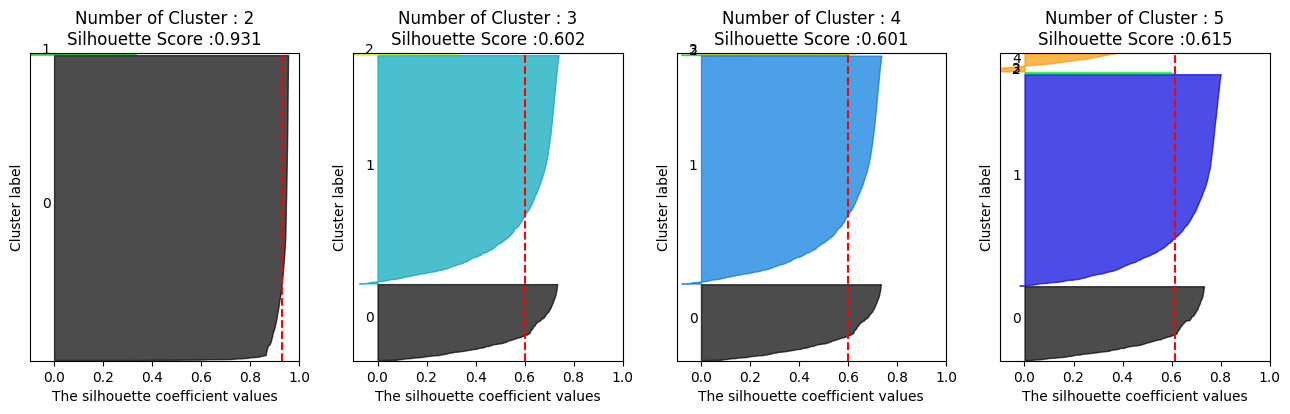

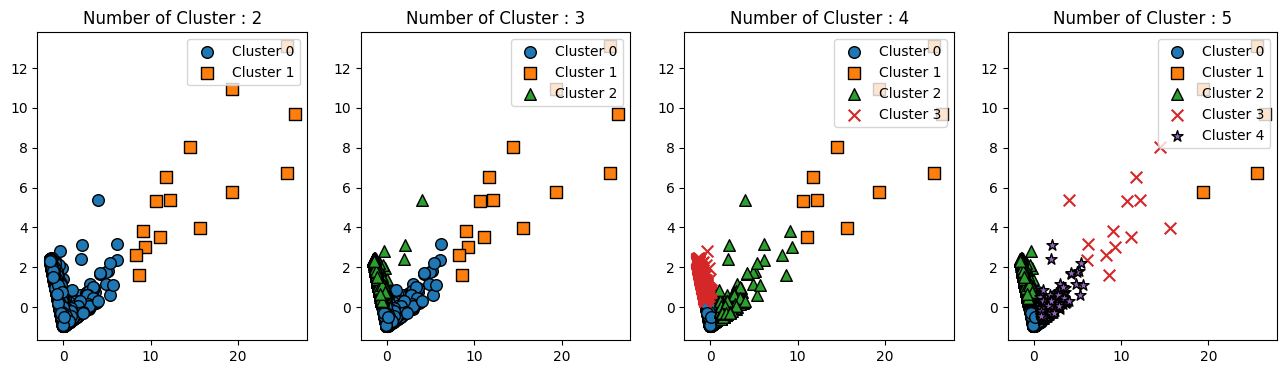

In [ ]:
visualize_silhouette([2,3,4,5],X_features_scaled)
visualize_kmeans_plot_multi([2,3,4,5],X_features_scaled)

* 결과를 확인해보면 군집이 잘 이루어지지만 특정 군집이 너무 적게 측정되는 문제가 있음.
* 비지도 학습의 알고리즘의 하나인 군집화의 기능적 의미는 숨어있는 새로운 집단을 발견하는 것. 새로운 군집 내의 데이터 값을 분석하고 이해함으로써 이 집단에 새로운 의미를 부여할 수 있다.
* 데이터 세트의 왜곡 정도를 낮추기 위해 가장 자주 사용되는 방법은 데이터 값에 로그를 적용하는 로그 변환. 온라인 판매 데이터 세트의 왜곡 정도를 낮추기 위해 전체 데이터를 로그 변환한 뒤 k 평균 알고리즘을 적용하고 결과를 비교

In [ ]:
### Log 변환을 통해 데이터 변환
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, silhouette_samples

# Recency, Frequecny, Monetary 컬럼에 np.log1p() 로 Log Transformation
cust_df['Recency_log'] = np.log1p(cust_df['Recency'])
cust_df['Frequency_log'] = np.log1p(cust_df['Frequency'])
cust_df['Monetary_log'] = np.log1p(cust_df['Monetary'])

# Log Transformation 데이터에 StandardScaler 적용
X_features = cust_df[['Recency_log','Frequency_log','Monetary_log']].values
X_features_scaled = StandardScaler().fit_transform(X_features)

kmeans = KMeans(n_clusters=3, random_state=0)
labels = kmeans.fit_predict(X_features_scaled)
cust_df['cluster_label'] = labels

print('실루엣 스코어는 : {0:.3f}'.format(silhouette_score(X_features_scaled,labels)))

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


실루엣 스코어는 : 0.304


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

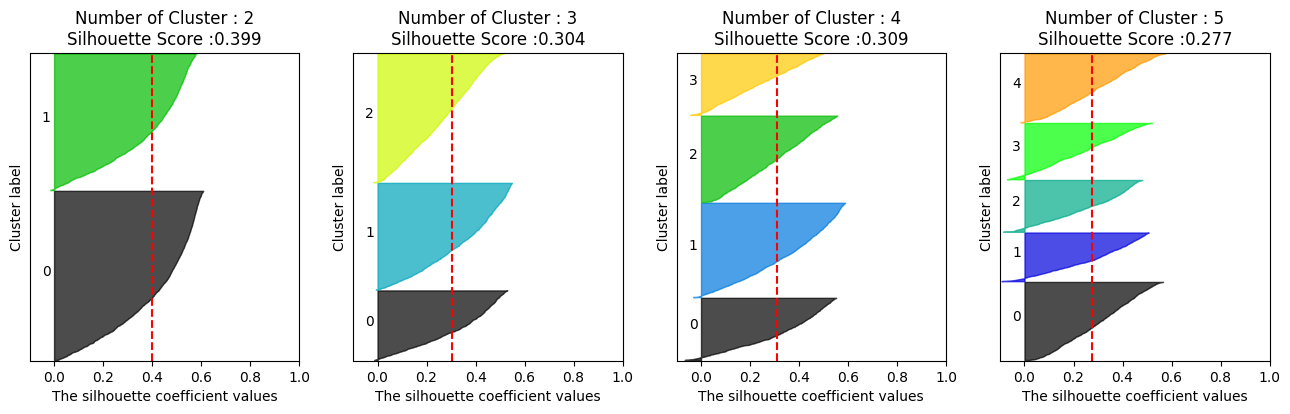

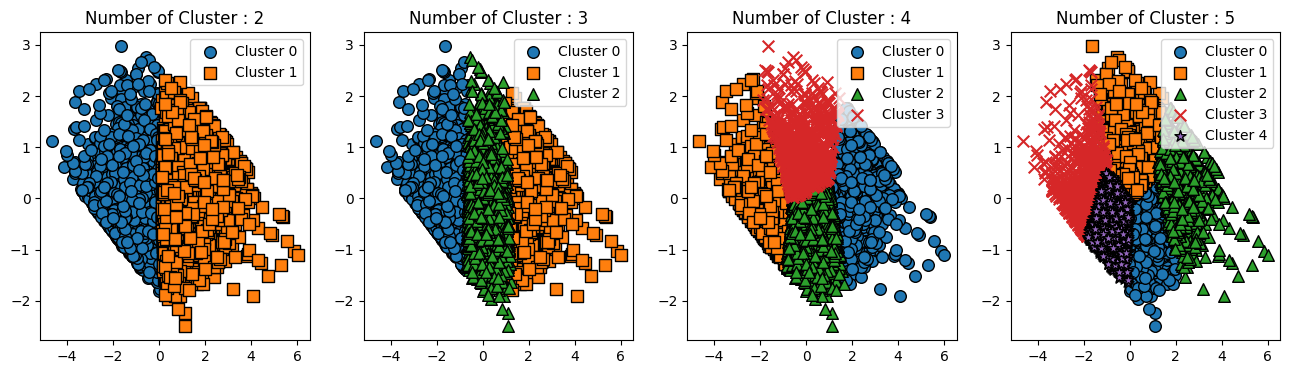

In [ ]:
visualize_silhouette([2,3,4,5],X_features_scaled)
visualize_kmeans_plot_multi([2,3,4,5],X_features_scaled)

실루엣 스코어는 전보다 떨어지지만 개별 군집이 더 균일하게 나눠진 것을 확인할 수 있다.



---

